In [22]:
from discretizer import discretizer
from client import client
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import matplotlib.pyplot as plt
from server import server_twosample_U, server_twosample_genrr, server_twosample_bitflip
from data_generator import data_generator
import time
import numpy as np
from scipy.stats import chi2
from utils import chi_sq_dist, projection_orth_one


# check coding error

In [23]:
alphabet_size = 6
A = projection_orth_one(alphabet_size)#symmetric
p_unif = torch.tensor([1/alphabet_size]).repeat(alphabet_size)
print(torch.matmul(A, p_unif)) # no coding error

tensor([ 3.7253e-09, -1.1176e-08,  0.0000e+00, -7.4506e-09, -3.7253e-09,
         3.7253e-09])


In [24]:
alphabet_size = 4
A = projection_orth_one(alphabet_size)#symmetric
p_unif = torch.tensor([1/alphabet_size]).repeat(alphabet_size)
print(torch.matmul(A, p_unif)) # no coding error

bump_size = 0.01

p1 = p_unif.add(
    torch.remainder(
    torch.tensor(range(alphabet_size)),
    2
    ).add(-1/2).mul(-2).mul(bump_size)
)
p2 = p_unif.add(
    torch.remainder(
    torch.tensor(range(alphabet_size)),
    2
    ).add(-1/2).mul(2).mul(bump_size)
)
print("\n\nperturbation")
print(p1)
print("projection")
print(torch.matmul(A, p1))

print("\n\nperturbation")
print(p2)
print("projection")
print(torch.matmul(A, p2))

tensor([0., 0., 0., 0.])


perturbation
tensor([0.2600, 0.2400, 0.2600, 0.2400])
projection
tensor([ 0.0100, -0.0100,  0.0100, -0.0100])


perturbation
tensor([0.2400, 0.2600, 0.2400, 0.2600])
projection
tensor([-0.0100,  0.0100, -0.0100,  0.0100])


# uniform vs perturbation

Gaboardi's setting 1: d=4, bump size = 0.01, privacy level = 1 -> power 0.2 at sample size=20000

In [11]:
alphabet_size = 4
bump_size = 0.01
sample_size_list = [50000]


A = projection_orth_one(alphabet_size)#symmetric
p_unif = torch.tensor([1/alphabet_size]).repeat(alphabet_size)
print(torch.matmul(A, p_unif)) # no coding error







p1 = p_unif.add(
    torch.remainder(
    torch.tensor(range(alphabet_size)),
    2
    ).add(-1/2).mul(-2).mul(bump_size)
)
p2 = p_unif.add(
    torch.remainder(
    torch.tensor(range(alphabet_size)),
    2
    ).add(-1/2).mul(2).mul(bump_size)
)
print("\n\nperturbation")
print(p1)
print("projection")
print(torch.matmul(A, p1))

print("\n\nperturbation")
print(p2)
print("projection")
print(torch.matmul(A, p2))



n_test = 100
n_permutation = 99
significance_level = 0.05



data_gen = data_generator(device)

t = time.time()
privacy_level = 1
LDPclient = client(device, privacy_level)
server_bitflip = server_twosample_bitflip(device, privacy_level)


p_value_array_bitflip = np.zeros([n_test, len(sample_size_list)])
p_value_array_bitflip_permu = np.zeros([n_test, len(sample_size_list)])


for i in range(n_test):
    if i%10 ==0:
        print(f"{i}th test")
    for j, sample_size in enumerate(sample_size_list):
        data_y = data_gen.generate_multinomial_data(p1, sample_size)
        data_z = data_gen.generate_multinomial_data(p2, sample_size)
        LDPclient.load_data_disc(data_y, data_z, alphabet_size)
      
        
        # bitflip
        data_y_bitflip, data_z_bitflip = LDPclient.release_bitflip()
        server_bitflip.load_private_data_multinomial(data_y_bitflip, data_z_bitflip, alphabet_size)      
        p_value_array_bitflip[i,j]  = server_bitflip.release_p_value()
        p_value_array_bitflip_permu[i,j]  = server_bitflip.release_p_value_permutation(n_permutation)
        

 
elapsed = time.time() - t
print(elapsed)

print(
   # f"small chi-square distance\n"+
        f"p1 = {p1}\n"+
        f"p2 = {p2}\n"+
        f"privacy level = {privacy_level}"
)
for j, sample_size in enumerate(sample_size_list):
    print(
        f"sample size = {sample_size},\n"+
        f"power estimate =\n"+
        f"    {sum( p_value_array_bitflip[:,j]<0.05)/n_test }(bitflip, chi)\n"+
        f"    {sum( p_value_array_bitflip_permu[:,j]<0.05)/n_test }(bitflip, permu)\n"
    )

tensor([0., 0., 0., 0.])


perturbation
tensor([0.2600, 0.2400, 0.2600, 0.2400])
projection
tensor([ 0.0100, -0.0100,  0.0100, -0.0100])


perturbation
tensor([0.2400, 0.2600, 0.2400, 0.2600])
projection
tensor([-0.0100,  0.0100, -0.0100,  0.0100])
0th test
10th test
20th test
30th test
40th test
50th test
60th test
70th test
80th test
90th test
66.45201683044434
p1 = tensor([0.2600, 0.2400, 0.2600, 0.2400])
p2 = tensor([0.2400, 0.2600, 0.2400, 0.2600])
privacy level = 1
sample size = 50000,
power estimate =
    0.74(bitflip, chi)
    0.74(bitflip, permu)



Gaboardi's setting 2: d=40, bump size = 0.005, privacy level = 1 -> power 0.25 at sample size=50000

In [20]:
alphabet_size = 40
bump_size = 0.005
sample_size_list = [50000]


A = projection_orth_one(alphabet_size)#symmetric
p_unif = torch.tensor([1/alphabet_size]).repeat(alphabet_size)
print(torch.matmul(A, p_unif)) # no coding error







#p1 = p_unif.add(
##    torch.remainder(
#    torch.tensor(range(alphabet_size)),
#    2
#    ).add(-1/2).mul(-2).mul(bump_size)
#)
p1 = p_unif
p2 = p_unif.add(
    torch.remainder(
    torch.tensor(range(alphabet_size)),
    2
    ).add(-1/2).mul(2).mul(bump_size)
)
print("\n\nperturbation")
print(p1)
print("projection")
print(torch.matmul(A, p1))

print("\n\nperturbation")
print(p2)
print("projection")
print(torch.matmul(A, p2))



n_test = 100
n_permutation = 99
significance_level = 0.05



data_gen = data_generator(device)

t = time.time()
privacy_level = 1
LDPclient = client(device, privacy_level)
server_bitflip = server_twosample_bitflip(device, privacy_level)


p_value_array_bitflip = np.zeros([n_test, len(sample_size_list)])
p_value_array_bitflip_permu = np.zeros([n_test, len(sample_size_list)])


for i in range(n_test):
    if i%10 ==0:
        print(f"{i}th test")
    for j, sample_size in enumerate(sample_size_list):
        data_y = data_gen.generate_multinomial_data(p1, sample_size)
        data_z = data_gen.generate_multinomial_data(p2, sample_size)
        LDPclient.load_data_disc(data_y, data_z, alphabet_size)
      
        
        # bitflip
        data_y_bitflip, data_z_bitflip = LDPclient.release_bitflip()
        server_bitflip.load_private_data(data_y_bitflip, data_z_bitflip)      
        p_value_array_bitflip[i,j]  = server_bitflip.release_p_value()
        p_value_array_bitflip_permu[i,j]  = server_bitflip.release_p_value_permutation(n_permutation)
        

 
elapsed = time.time() - t
print(elapsed)

print(
   # f"small chi-square distance\n"+
        f"p1 = {p1}\n"+
        f"p2 = {p2}\n"+
        f"privacy level = {privacy_level}"
)
for j, sample_size in enumerate(sample_size_list):
    print(
        f"sample size = {sample_size},\n"+
        f"power estimate =\n"+
        f"    {sum( p_value_array_bitflip[:,j]<0.05)/n_test }(bitflip, chi)\n"+
        f"    {sum( p_value_array_bitflip_permu[:,j]<0.05)/n_test }(bitflip, permu)\n"
    )

tensor([ 1.1642e-10,  1.1642e-10, -8.1491e-10,  1.1642e-10, -8.1491e-10,
        -1.7462e-09, -8.1491e-10,  1.1642e-10, -8.1491e-10,  1.1642e-10,
        -8.1491e-10,  1.1642e-10, -8.1491e-10, -1.7462e-09, -8.1491e-10,
         1.1642e-10, -8.1491e-10, -1.7462e-09, -8.1491e-10,  1.1642e-10,
        -8.1491e-10, -1.7462e-09, -8.1491e-10,  1.1642e-10, -8.1491e-10,
         1.1642e-10, -8.1491e-10,  1.1642e-10, -8.1491e-10, -1.7462e-09,
        -8.1491e-10,  1.1642e-10, -8.1491e-10, -1.9791e-09,  0.0000e+00,
         0.0000e+00, -1.8626e-09, -1.2806e-09,  0.0000e+00,  0.0000e+00])


perturbation
tensor([0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
        0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
        0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
        0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
        0.0250, 0.0250, 0.0250, 0.0250])
projection
tensor([ 1.1642e-10,  1.1642

In [117]:
alphabet_size = 4
bump_size = 0.01
sample_size_list = [50000]


A = projection_orth_one(alphabet_size)#symmetric
p_unif = torch.tensor([1/alphabet_size]).repeat(alphabet_size)
print(torch.matmul(A, p_unif)) # no coding error







p1 = p_unif.add(
    torch.remainder(
    torch.tensor(range(alphabet_size)),
    2
    ).add(-1/2).mul(-2).mul(bump_size)
)
p2 = p_unif.add(
    torch.remainder(
    torch.tensor(range(alphabet_size)),
    2
    ).add(-1/2).mul(2).mul(bump_size)
)
print("\n\nperturbation")
print(p1)
print("projection")
print(torch.matmul(A, p1))

print("\n\nperturbation")
print(p2)
print("projection")
print(torch.matmul(A, p2))



n_test = 100
n_permutation = 99
significance_level = 0.05



data_gen = data_generator(device)

t = time.time()
privacy_level = 1
LDPclient = client(device, privacy_level)
server_bitflip = server_twosample_bitflip(device, privacy_level)
server_genrr = server_twosample_genrr(device, privacy_level)
server_lapu = server_twosample_U(device, 100)


p_value_array_bitflip = np.zeros([n_test, len(sample_size_list)])
p_value_array_bitflip_permu = np.zeros([n_test, len(sample_size_list)])
p_value_array_genrr = np.zeros([n_test, len(sample_size_list)])
p_value_array_genrr_permu = np.zeros([n_test, len(sample_size_list)])

for i in range(n_test):
    if i%10 ==0:
        print(f"{i}th test")
    for j, sample_size in enumerate(sample_size_list):
        data_y = data_gen.generate_multinomial_data(p1, sample_size)
        data_z = data_gen.generate_multinomial_data(p2, sample_size)
        LDPclient.load_data_disc(data_y, data_z, alphabet_size)
      
        
        # bitflip
        data_y_bitflip, data_z_bitflip = LDPclient.release_bitflip()
        server_bitflip.load_private_data(data_y_bitflip, data_z_bitflip)      
        p_value_array_bitflip[i,j]  = server_bitflip.release_p_value()
        p_value_array_bitflip_permu[i,j]  = server_bitflip.release_p_value_permutation(n_permutation)
        
        #genrr
        data_y_genrr, data_z_genrr, alphabet_size = LDPclient.release_genrr()
        data_y_lapu, data_z_lapu = LDPclient.release_lapu()
        server_lapu.load_private_data(data_y_lapu, data_z_lapu)
 
elapsed = time.time() - t
print(elapsed)

print(
   # f"small chi-square distance\n"+
        f"p1 = {p1}\n"+
        f"p2 = {p2}\n"+
        f"privacy level = {privacy_level}"
)
for j, sample_size in enumerate(sample_size_list):
    print(
        f"sample size = {sample_size},\n"+
        f"power estimate =\n"+
        f"    {sum( p_value_array_bitflip[:,j]<0.05)/n_test }(bitflip, chi)\n"+
        f"    {sum( p_value_array_bitflip_permu[:,j]<0.05)/n_test }(bitflip, permu)\n"
    )

p1 = tensor([0.1350, 0.1150, 0.1350, 0.1150, 0.1350, 0.1150, 0.1350, 0.1150])
p2 = tensor([0.1150, 0.1350, 0.1150, 0.1350, 0.1150, 0.1350, 0.1150, 0.1350])
privacy level = 16.0
sample size = 2000,
power estimate =
    0.92(lapu, permu)
    0.0(bitflip, chi)
    0.09(bitflip, permu)
    0.95(genrr, chi)
    0.96(genrr, permu)



# large chi-square distance

In [120]:
n_test = 100
n_permutation = 99
significance_level = 0.05
alphabet_size = 4


sample_size_list = [1000]

data_gen = data_generator(device)

p1 = torch.tensor([0,  1/2,  0 , 1/2])
p2 = torch.tensor([1/2,   0,  1/2, 0 ])
print(torch.dist(p1,p2,p=2))
print(chi_sq_dist(p1,p2))

tensor(1.)
tensor(1.4142)


In [122]:
t = time.time()
privacy_level = 0.1
LDPclient = client(device, privacy_level)
server_bitflip = server_twosample_bitflip(device, privacy_level)
server_genrr = server_twosample_genrr(device, privacy_level)
server_lapu = server_twosample_U(device, privacy_level)

p_value_array_bitflip = np.zeros([n_test, len(sample_size_list)])
p_value_array_bitflip_permu = np.zeros([n_test, len(sample_size_list)])
p_value_array_genrr = np.zeros([n_test, len(sample_size_list)])
p_value_array_genrr_permu = np.zeros([n_test, len(sample_size_list)])
p_value_array_lapu_permu = np.zeros([n_test, len(sample_size_list)])

for i in range(n_test):
    print(f"{i+1}th test")
    for j, sample_size in enumerate(sample_size_list):
        data_y = data_gen.generate_multinomial_data(p1, sample_size)
        data_z = data_gen.generate_multinomial_data(p2, sample_size)
        LDPclient.load_data_disc(data_y, data_z, alphabet_size)
        
           # lapu
        data_y_lapu, data_z_lapu = LDPclient.release_lapu()
        server_lapu.load_private_data(data_y_lapu, data_z_lapu)
        p_value_array_lapu_permu[i,j] = server_lapu.release_p_value_permutation(n_permutation)      
        
            # bitflip
        data_y_bitflip, data_z_bitflip = LDPclient.release_bitflip()
        server_bitflip.load_private_data(data_y_bitflip, data_z_bitflip)      
        p_value_array_bitflip[i,j]  = server_bitflip.release_p_value()
        p_value_array_bitflip_permu[i,j]  = server_bitflip.release_p_value_permutation(n_permutation)
        
        # genrr
        data_y_genrr, data_z_genrr, alphabet_size = LDPclient.release_genrr()
        server_genrr.load_private_data(data_y_genrr, data_z_genrr, alphabet_size)
        p_value_array_genrr[i,j]  = server_genrr.release_p_value()
        p_value_array_genrr_permu[i,j]  = server_genrr.release_p_value_permutation(n_permutation)

 
elapsed = time.time() - t
print(elapsed)

1th test
2th test
3th test
4th test
5th test
6th test
7th test
8th test
9th test
10th test
11th test
12th test
13th test
14th test
15th test
16th test
17th test
18th test
19th test
20th test
21th test
22th test
23th test
24th test
25th test
26th test
27th test
28th test
29th test
30th test
31th test
32th test
33th test
34th test
35th test
36th test
37th test
38th test
39th test
40th test
41th test
42th test
43th test
44th test
45th test
46th test
47th test
48th test
49th test
50th test
51th test
52th test
53th test
54th test
55th test
56th test
57th test
58th test
59th test
60th test
61th test
62th test
63th test
64th test
65th test
66th test
67th test
68th test
69th test
70th test
71th test
72th test
73th test
74th test
75th test
76th test
77th test
78th test
79th test
80th test
81th test
82th test
83th test
84th test
85th test
86th test
87th test
88th test
89th test
90th test
91th test
92th test
93th test
94th test
95th test
96th test
97th test
98th test
99th test
100th test
30.53968

In [123]:
print(
    f"small chi-square distance\n"+
        f"p1 = {p1}\n"+
        f"p2 = {p2}\n"+
        f"privacy level = {privacy_level}"
)
for j, sample_size in enumerate(sample_size_list):
    print(
        f"sample size = {sample_size},\n"+
        f"power estimate =\n"+
        f"    {sum( p_value_array_lapu_permu[:,j]<0.05)/n_test }(lapu, permu)\n"+
        f"    {sum( p_value_array_bitflip[:,j]<0.05)/n_test }(bitflip, chi)\n"+
        f"    {sum( p_value_array_bitflip_permu[:,j]<0.05)/n_test }(bitflip, permu)\n"+
        f"    {sum( p_value_array_genrr[:,j]<0.05)/n_test }(genrr, chi)\n" +
        f"    {sum( p_value_array_genrr_permu[:,j]<0.05)/n_test }(genrr, chi)\n"
    )

small chi-square distance
p1 = tensor([0.0000, 0.5000, 0.0000, 0.5000])
p2 = tensor([0.5000, 0.0000, 0.5000, 0.0000])
privacy level = 0.1
sample size = 1000,
power estimate =
    0.09(lapu, permu)
    0.0(bitflip, chi)
    0.06(bitflip, permu)
    0.14(genrr, chi)
    0.16(genrr, chi)



# low chi-square distance

In [28]:
p1 = torch.tensor([7/16,  5/16,  3/16 , 1/16])
p2 = torch.tensor([1/16,  3/16,  5/16,  7/16 ])
print(torch.dist(p1,p2,p=2))
print(chi_sq_dist(p1,p2))

tensor(0.5590)
tensor(0.7906)


In [29]:



t = time.time()
privacy_level = 0.8
LDPclient = client(device, privacy_level)
server_bitflip = server_twosample_bitflip(device, privacy_level)
server_genrr = server_twosample_genrr(device, privacy_level)
server_lapu = server_twosample_U(device, privacy_level)

p_value_array_bitflip = np.zeros([n_test, len(sample_size_list)])
p_value_array_bitflip_permu = np.zeros([n_test, len(sample_size_list)])
p_value_array_genrr = np.zeros([n_test, len(sample_size_list)])
p_value_array_genrr_permu = np.zeros([n_test, len(sample_size_list)])
p_value_array_lapu_permu = np.zeros([n_test, len(sample_size_list)])

for i in range(n_test):
    for j, sample_size in enumerate(sample_size_list):
        data_y = data_gen.generate_multinomial_data(p1, sample_size)
        data_z = data_gen.generate_multinomial_data(p2, sample_size)
        LDPclient.load_data_disc(data_y, data_z, alphabet_size)
        
           # lapu
        data_y_lapu, data_z_lapu = LDPclient.release_lapu()
        server_lapu.load_private_data(data_y_lapu, data_z_lapu)
        p_value_array_lapu_permu[i,j] = server_lapu.release_p_value_permutation(n_permutation)      
        
            # bitflip
        data_y_bitflip, data_z_bitflip = LDPclient.release_bitflip()
        server_bitflip.load_private_data(data_y_bitflip, data_z_bitflip)      
        p_value_array_bitflip[i,j]  = server_bitflip.release_p_value()
        p_value_array_bitflip_permu[i,j]  = server_bitflip.release_p_value_permutation(n_permutation)
        
        # genrr
        data_y_genrr, data_z_genrr = LDPclient.release_genrr()
        server_genrr.load_private_data(data_y_genrr, data_z_genrr)
        p_value_array_genrr[i,j]  = server_genrr.release_p_value()
        #p_value_array_genrr_permu[i,j]  = server_genrr.release_p_value_permutation(n_permutation)

 
elapsed = time.time() - t
elapsed

138.14739894866943

In [30]:
print(
    f"small chi-square distance\n"+
        f"p1 = {p1}\n"+
        f"p2 = {p2}\n"+
        f"privacy level = {privacy_level}"
)

for j, sample_size in enumerate(sample_size_list):
    print(
        f"sample size = {sample_size},\n"+
        f"power estimate =\n"+
        f"    {sum( p_value_array_lapu_permu[:,j]<0.05)/n_test }(lapu, permu)\n"+
        f"    {sum( p_value_array_bitflip[:,j]<0.05)/n_test }(bitflip, chi)\n"+
        f"    {sum( p_value_array_bitflip_permu[:,j]<0.05)/n_test }(bitflip, permu)\n"+
        f"    {sum( p_value_array_genrr[:,j]<0.05)/n_test }(genrr, chi)\n"
    )

small chi-square distance
p1 = tensor([0.4375, 0.3125, 0.1875, 0.0625])
p2 = tensor([0.0625, 0.1875, 0.3125, 0.4375])
privacy level = 0.8
sample size = 200,
power estimate =
    0.22(lapu, permu)
    0.0(bitflip, chi)
    0.06(bitflip, permu)
    0.0(genrr, chi)

sample size = 600,
power estimate =
    0.56(lapu, permu)
    0.01(bitflip, chi)
    0.21(bitflip, permu)
    0.0(genrr, chi)

sample size = 1000,
power estimate =
    0.81(lapu, permu)
    0.0(bitflip, chi)
    0.32(bitflip, permu)
    0.0(genrr, chi)

sample size = 1400,
power estimate =
    0.93(lapu, permu)
    0.0(bitflip, chi)
    0.67(bitflip, permu)
    0.0(genrr, chi)

sample size = 1600,
power estimate =
    0.94(lapu, permu)
    0.0(bitflip, chi)
    0.67(bitflip, permu)
    0.0(genrr, chi)

sample size = 10000,
power estimate =
    1.0(lapu, permu)
    1.0(bitflip, chi)
    1.0(bitflip, permu)
    0.0(genrr, chi)



bitflip two-sample test, chi-square threshold
sample size = 200, power estimate= 0.001

sample size = 400, power estimate= 0.013

sample size = 600, power estimate= 0.07

sample size = 800, power estimate= 0.302

sample size = 1000, power estimate= 0.695

sample size = 1200, power estimate= 0.924

sample size = 1400, power estimate= 0.99

sample size = 1600, power estimate= 1.0



In [18]:
t = time.time()
privacy_level = 0.8
LDPclient = client(device, privacy_level)
server_bitflip = server_twosample_bitflip(device, privacy_level)
server_genrr = server_twosample_genrr(device, privacy_level)
server_lapu = server_twosample_U(device, privacy_level)

p_value_array_bitflip = np.zeros([n_test, len(sample_size_list)])
p_value_array_bitflip_permu = np.zeros([n_test, len(sample_size_list)])
p_value_array_genrr = np.zeros([n_test, len(sample_size_list)])
p_value_array_genrr_permu = np.zeros([n_test, len(sample_size_list)])
p_value_array_lapu_permu = np.zeros([n_test, len(sample_size_list)])

for i in range(n_test):
    for j, sample_size in enumerate(sample_size_list):
        data_y = data_gen.generate_multinomial_data(p1, sample_size)
        data_z = data_gen.generate_multinomial_data(p2, sample_size)
        LDPclient.load_data_disc(data_y, data_z, alphabet_size)
        
       # lapu
        data_y_lapu, data_z_lapu = LDPclient.release_lapu()
        server_lapu.load_private_data(data_y_lapu, data_z_lapu)
        p_value_array_lapu_permu[i,j] = server_lapu.release_p_value_permutation(n_permutation)      
        
        # bitflip
        data_y_bitflip, data_z_bitflip = LDPclient.release_bitflip()
        server_bitflip.load_private_data(data_y_bitflip, data_z_bitflip)      
        p_value_array_bitflip[i,j]  = server_bitflip.release_p_value()
        p_value_array_bitflip_permu[i,j]  = server_bitflip.release_p_value_permutation(n_permutation)
        
        # genrr
        data_y_genrr, data_z_genrr = LDPclient.release_genrr()
        server_genrr.load_private_data(data_y_genrr, data_z_genrr)
        p_value_array_genrr[i,j]  = server_genrr.release_p_value()
        #p_value_array_genrr_permu[i,j]  = server_genrr.release_p_value_permutation(n_permutation)

 
elapsed = time.time() - t
elapsed

0.0

# Type I error

In [59]:
beta = 2.5
data_gen = data_generator(device)
p_null = data_gen._generate_power_law_p(alphabet_size, beta)
print(p_null)

n_test = 100
n_permutation = 99
significance_level = 0.05
alphabet_size = 10

sample_size_list = [20000]

tensor([0.7565, 0.1337, 0.0485, 0.0236, 0.0135, 0.0086, 0.0058, 0.0042, 0.0031,
        0.0024], device='cuda:0')


In [ ]:
t = time.time()
privacy_level = 0.8
LDPclient = client(device, privacy_level)
server_bitflip = server_twosample_bitflip(device, privacy_level)
server_genrr = server_twosample_genrr(device, privacy_level)
server_lapu = server_twosample_U(device, privacy_level)

p_value_array_bitflip = np.zeros([n_test, len(sample_size_list)])
p_value_array_bitflip_permu = np.zeros([n_test, len(sample_size_list)])
p_value_array_genrr = np.zeros([n_test, len(sample_size_list)])
p_value_array_genrr_permu = np.zeros([n_test, len(sample_size_list)])
p_value_array_lapu_permu = np.zeros([n_test, len(sample_size_list)])

for i in range(n_test):
    print(f"{i}th test")
    for j, sample_size in enumerate(sample_size_list):
        data_y = data_gen.generate_multinomial_data(p_null, sample_size)
        data_z = data_gen.generate_multinomial_data(p_null, sample_size)
        LDPclient.load_data_disc(data_y, data_z, alphabet_size)
        
        # lapu
        data_y_lapu, data_z_lapu = LDPclient.release_lapu()
        server_lapu.load_private_data(data_y_lapu, data_z_lapu)
        p_value_array_lapu_permu[i,j] = server_lapu.release_p_value_permutation(n_permutation)      
        
        # bitflip
        data_y_bitflip, data_z_bitflip = LDPclient.release_bitflip()
        server_bitflip.load_private_data(data_y_bitflip, data_z_bitflip)      
        p_value_array_bitflip[i,j]  = server_bitflip.release_p_value()
        p_value_array_bitflip_permu[i,j]  = server_bitflip.release_p_value_permutation(n_permutation)
        
        # genrr
        data_y_genrr, data_z_genrr, alphabet_size = LDPclient.release_genrr()
        server_genrr.load_private_data(data_y_genrr, data_z_genrr, alphabet_size)
        p_value_array_genrr[i,j]  = server_genrr.release_p_value()
        p_value_array_genrr_permu[i,j]  = server_genrr.release_p_value_permutation(n_permutation)

 
elapsed = time.time() - t
print(elapsed)

<ipython-input-27-43f600c2d3ea>:166: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  p_tensor = torch.tensor(p).to(self.cuda_device)
<ipython-input-27-43f600c2d3ea>:172: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  p_tensor = torch.tensor(p).to(self.cuda_device)


0.53587717
0.5369541
0.5296032
0.518474


(array([  1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   0.,   1.,   1.,   2.,   1.,   0.,   3.,   1.,   2.,   3.,
          3.,   3.,   2.,   5.,   3.,   4.,   2.,   4.,   5.,  10.,   6.,
          8.,  14.,  15.,  19.,   9.,  21.,  21.,  34.,  44.,  40.,  43.,
         54.,  68.,  86., 138., 156., 164.]),
 array([0.22651842, 0.24198787, 0.25745732, 0.27292677, 0.28839622,
        0.30386568, 0.31933513, 0.33480458, 0.35027403, 0.36574348,
        0.38121294, 0.39668239, 0.41215184, 0.42762129, 0.44309074,
        0.4585602 , 0.47402965, 0.4894991 , 0.50496855, 0.520438  ,
        0.53590745, 0.55137691, 0.56684636, 0.58231581, 0.59778526,
        0.61325471, 0.62872417, 0.64419362, 0.65966307, 0.67513252,
        0.69060197, 0.70607143, 0.72154088, 0.73701033, 0.75247978,
        0.76794923, 0.78341868, 0.79888814, 0.81435759, 0.82982704,
        0.84529649, 0.86076594, 0.8762354 , 0.89170485, 0.9071743 ,
        0.92264375, 0.9381132 , 0.95358266, 0.

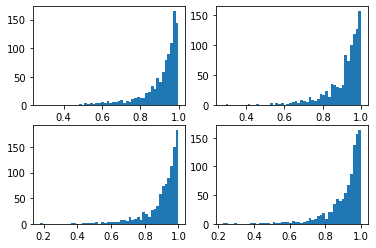

In [64]:
print(
   # f"small chi-square distance\n"+
        f"p1 = {p1}\n"+
        f"p2 = {p2}\n"+
        f"privacy level = {privacy_level}"
)
for j, sample_size in enumerate(sample_size_list):
    print(
        f"sample size = {sample_size},\n"+
        f"power estimate =\n"+
        f"    {sum( p_value_array_lapu_permu[:,j]<0.05)/n_test }(lapu, permu)\n"+
        f"    {sum( p_value_array_bitflip[:,j]<0.05)/n_test }(bitflip, chi)\n"+
        f"    {sum( p_value_array_bitflip_permu[:,j]<0.05)/n_test }(bitflip, permu)\n"+
        f"    {sum( p_value_array_genrr[:,j]<0.05)/n_test }(genrr, chi)\n" +
        f"    {sum( p_value_array_genrr_permu[:,j]<0.05)/n_test }(genrr, permu)\n"
    )

# privacy level = 4

<ipython-input-27-43f600c2d3ea>:166: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  p_tensor = torch.tensor(p).to(self.cuda_device)
<ipython-input-27-43f600c2d3ea>:172: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  p_tensor = torch.tensor(p).to(self.cuda_device)


0.10911968
0.11399892
0.1152359
0.107417814


(array([  2.,   1.,   1.,   0.,   1.,   2.,   0.,   1.,   0.,   3.,   1.,
          2.,   1.,   2.,   1.,   2.,   3.,   0.,   4.,   2.,   2.,   1.,
          1.,   2.,   2.,   4.,   7.,   8.,   6.,  12.,   7.,   2.,   4.,
          9.,   7.,  15.,  12.,  19.,  15.,  17.,  12.,  21.,  19.,  36.,
         35.,  63.,  57.,  53.,  90., 433.]),
 array([0.82051461, 0.82410432, 0.82769403, 0.83128374, 0.83487344,
        0.83846315, 0.84205286, 0.84564257, 0.84923228, 0.85282198,
        0.85641169, 0.8600014 , 0.86359111, 0.86718081, 0.87077052,
        0.87436023, 0.87794994, 0.88153965, 0.88512935, 0.88871906,
        0.89230877, 0.89589848, 0.89948818, 0.90307789, 0.9066676 ,
        0.91025731, 0.91384701, 0.91743672, 0.92102643, 0.92461614,
        0.92820585, 0.93179555, 0.93538526, 0.93897497, 0.94256468,
        0.94615438, 0.94974409, 0.9533338 , 0.95692351, 0.96051322,
        0.96410292, 0.96769263, 0.97128234, 0.97487205, 0.97846175,
        0.98205146, 0.98564117, 0.98923088, 0.

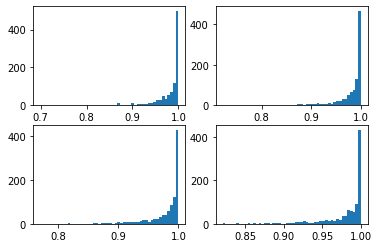

In [63]:
t = time.time()

server_now = server_twosample_projection(device)
data_gen = data_generator(device)
alphabet_size = 4
beta = 2.5
n_test = 1000
significance_level = 0.05
privacy_level = 4
sample_size_list = [100, 1000, 10000, 1000000]
test_result = torch.zeros(n_test).to(device)
test_statistic = torch.zeros(n_test, len(sample_size_list)).to(device)

p_null = data_gen._generate_power_law_p(alphabet_size, beta)
for i in range(n_test):
    for j, sample_size in enumerate(sample_size_list):
        data_y = data_gen.generate_nearly_unif(alphabet_size, beta, sample_size = sample_size)
        data_z = data_gen.generate_nearly_unif(alphabet_size, beta, sample_size = sample_size)
        LDPclient = client(device)
        LDPclient.load_data_disc(data_y, data_z, alphabet_size)
    
        data_y_priv, data_z_priv = LDPclient.release_bitflip(privacy_level)
        #test_statistic[i]  = server_now._calculate_statistic(data_y_priv, data_z_priv)
        test_statistic[i,j]  = server_now._calculate_statistic_gof(data_y_priv, p_null, privacy_level)
  
elapsed = time.time() - t
elapsed


test_statistic_100 = test_statistic[:,0].cpu().numpy().flatten()
test_statistic_1000 = test_statistic[:,1].cpu().numpy().flatten()
test_statistic_10000 = test_statistic[:,2].cpu().numpy().flatten()
test_statistic_1000000 = test_statistic[:,3].cpu().numpy().flatten()


print(test_statistic_100.mean())
print(test_statistic_1000.mean())
print(test_statistic_10000.mean())
print(test_statistic_1000000.mean())

chisq_dist = chi2(alphabet_size-1)


fig, axs = plt.subplots(2,2)
axs[0,0].hist(chisq_dist.sf(test_statistic_100), bins =50)
axs[0,1].hist(chisq_dist.sf(test_statistic_1000), bins =50)
axs[1,0].hist(chisq_dist.sf(test_statistic_10000), bins =50)
axs[1,1].hist(chisq_dist.sf(test_statistic_1000000), bins =50)

# privacy level = 8

<ipython-input-27-43f600c2d3ea>:166: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  p_tensor = torch.tensor(p).to(self.cuda_device)
<ipython-input-27-43f600c2d3ea>:172: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  p_tensor = torch.tensor(p).to(self.cuda_device)


0.6544658
0.62547386
0.57424915
0.64513266


(array([  1.,   1.,   1.,   3.,   2.,   0.,   0.,   0.,   2.,   1.,   5.,
          1.,   1.,   0.,   1.,   4.,   3.,   4.,   2.,   4.,   5.,   1.,
          8.,   5.,   7.,   4.,   5.,   4.,   6.,  10.,  12.,   9.,  14.,
          8.,  11.,  19.,  15.,  16.,  27.,  30.,  19.,  37.,  30.,  45.,
         42.,  54.,  85.,  77., 117., 242.]),
 array([0.16075167, 0.17753664, 0.1943216 , 0.21110657, 0.22789154,
        0.2446765 , 0.26146147, 0.27824644, 0.2950314 , 0.31181637,
        0.32860134, 0.3453863 , 0.36217127, 0.37895624, 0.3957412 ,
        0.41252617, 0.42931114, 0.4460961 , 0.46288107, 0.47966604,
        0.496451  , 0.51323597, 0.53002094, 0.5468059 , 0.56359087,
        0.58037584, 0.5971608 , 0.61394577, 0.63073073, 0.6475157 ,
        0.66430067, 0.68108563, 0.6978706 , 0.71465557, 0.73144053,
        0.7482255 , 0.76501047, 0.78179543, 0.7985804 , 0.81536537,
        0.83215033, 0.8489353 , 0.86572027, 0.88250523, 0.8992902 ,
        0.91607517, 0.93286013, 0.9496451 , 0.

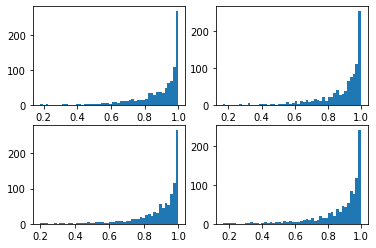

In [60]:
t = time.time()

server_now = server_twosample_projection(device)
data_gen = data_generator(device)
alphabet_size = 4
beta = 2.5
n_test = 1000
significance_level = 0.05
privacy_level = 8
sample_size_list = [100, 1000, 10000, 1000000]
test_result = torch.zeros(n_test).to(device)
test_statistic = torch.zeros(n_test, len(sample_size_list)).to(device)

p_null = data_gen._generate_power_law_p(alphabet_size, beta)
for i in range(n_test):
    for j, sample_size in enumerate(sample_size_list):
        data_y = data_gen.generate_nearly_unif(alphabet_size, beta, sample_size = sample_size)
        data_z = data_gen.generate_nearly_unif(alphabet_size, beta, sample_size = sample_size)
        LDPclient = client(device)
        LDPclient.load_data_disc(data_y, data_z, alphabet_size)
    
        data_y_priv, data_z_priv = LDPclient.release_bitflip(privacy_level)
        #test_statistic[i]  = server_now._calculate_statistic(data_y_priv, data_z_priv)
        test_statistic[i,j]  = server_now._calculate_statistic_gof(data_y_priv, p_null, privacy_level)
  
elapsed = time.time() - t
elapsed


test_statistic_100 = test_statistic[:,0].cpu().numpy().flatten()
test_statistic_1000 = test_statistic[:,1].cpu().numpy().flatten()
test_statistic_10000 = test_statistic[:,2].cpu().numpy().flatten()
test_statistic_1000000 = test_statistic[:,3].cpu().numpy().flatten()


print(test_statistic_100.mean())
print(test_statistic_1000.mean())
print(test_statistic_10000.mean())
print(test_statistic_1000000.mean())

chisq_dist = chi2(alphabet_size-1)


fig, axs = plt.subplots(2,2)
axs[0,0].hist(chisq_dist.sf(test_statistic_100), bins =50)
axs[0,1].hist(chisq_dist.sf(test_statistic_1000), bins =50)
axs[1,0].hist(chisq_dist.sf(test_statistic_10000), bins =50)
axs[1,1].hist(chisq_dist.sf(test_statistic_1000000), bins =50)

# privacy level = 12

<ipython-input-27-43f600c2d3ea>:166: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  p_tensor = torch.tensor(p).to(self.cuda_device)
<ipython-input-27-43f600c2d3ea>:172: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  p_tensor = torch.tensor(p).to(self.cuda_device)


4.2564874
3.9883702
4.1403894
3.882773


(array([94., 33., 20., 28., 23., 20., 19., 14., 21., 11., 16., 18., 12.,
        16., 15.,  6., 15., 16., 16., 13., 12., 15., 13., 12., 13., 14.,
        12., 13., 19., 17., 19., 17., 12., 17., 17., 15., 14., 25., 28.,
        23., 12., 19., 16., 17., 16., 23., 20., 23., 35., 66.]),
 array([2.71218658e-08, 2.00000266e-02, 4.00000260e-02, 6.00000255e-02,
        8.00000250e-02, 1.00000024e-01, 1.20000024e-01, 1.40000023e-01,
        1.60000023e-01, 1.80000022e-01, 2.00000022e-01, 2.20000021e-01,
        2.40000021e-01, 2.60000020e-01, 2.80000020e-01, 3.00000019e-01,
        3.20000018e-01, 3.40000018e-01, 3.60000017e-01, 3.80000017e-01,
        4.00000016e-01, 4.20000016e-01, 4.40000015e-01, 4.60000015e-01,
        4.80000014e-01, 5.00000014e-01, 5.20000013e-01, 5.40000012e-01,
        5.60000012e-01, 5.80000011e-01, 6.00000011e-01, 6.20000010e-01,
        6.40000010e-01, 6.60000009e-01, 6.80000009e-01, 7.00000008e-01,
        7.20000008e-01, 7.40000007e-01, 7.60000007e-01, 7.80000006e-

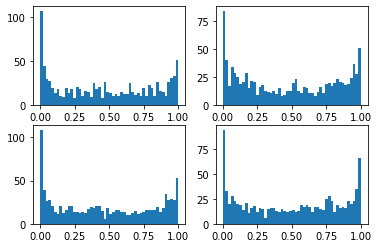

In [57]:
t = time.time()

server_now = server_twosample_projection(device)
data_gen = data_generator(device)
alphabet_size = 4
beta = 2.5
n_test = 1000
significance_level = 0.05
privacy_level = 12
sample_size_list = [100, 1000, 10000, 1000000]
test_result = torch.zeros(n_test).to(device)
test_statistic = torch.zeros(n_test, len(sample_size_list)).to(device)

p_null = data_gen._generate_power_law_p(alphabet_size, beta)
for i in range(n_test):
    for j, sample_size in enumerate(sample_size_list):
        data_y = data_gen.generate_nearly_unif(alphabet_size, beta, sample_size = sample_size)
        data_z = data_gen.generate_nearly_unif(alphabet_size, beta, sample_size = sample_size)
        LDPclient = client(device)
        LDPclient.load_data_disc(data_y, data_z, alphabet_size)
    
        data_y_priv, data_z_priv = LDPclient.release_bitflip(privacy_level)
        #test_statistic[i]  = server_now._calculate_statistic(data_y_priv, data_z_priv)
        test_statistic[i,j]  = server_now._calculate_statistic_gof(data_y_priv, p_null, privacy_level)
  
elapsed = time.time() - t
elapsed


test_statistic_100 = test_statistic[:,0].cpu().numpy().flatten()
test_statistic_1000 = test_statistic[:,1].cpu().numpy().flatten()
test_statistic_10000 = test_statistic[:,2].cpu().numpy().flatten()
test_statistic_1000000 = test_statistic[:,3].cpu().numpy().flatten()


print(test_statistic_100.mean())
print(test_statistic_1000.mean())
print(test_statistic_10000.mean())
print(test_statistic_1000000.mean())

chisq_dist = chi2(alphabet_size-1)


fig, axs = plt.subplots(2,2)
axs[0,0].hist(chisq_dist.sf(test_statistic_100), bins =50)
axs[0,1].hist(chisq_dist.sf(test_statistic_1000), bins =50)
axs[1,0].hist(chisq_dist.sf(test_statistic_10000), bins =50)
axs[1,1].hist(chisq_dist.sf(test_statistic_1000000), bins =50)

In [27]:
from abc import ABCMeta, abstractmethod
from client import client
import utils
import torch
from scipy.stats import chi2
import numpy

class server(client):
    def release_p_value(self, data_y, data_z, n_permutation):
        return(self._permutation_test(data_y, data_z, n_permutation))

    def _permutation_test(self, data_y, data_z, n_permutation):
        n_1 = utils.get_sample_size(data_y)
        n_2 = utils.get_sample_size(data_z)
        n = n_1 + n_2
        tst_data_combined = torch.vstack((data_y, data_z))
       
        u_stat_original = self._calculate_statistic(data_y, data_z) #original statistic
        #print(f"original u-statistic:{u_stat_original}")
        
        #permutation procedure
        u_stat_permuted = torch.empty(n_permutation).to(self.cuda_device)
        
        for i in range(n_permutation):
            permutation = torch.randperm(n)
            perm_stat_now = self._calculate_statistic(
                tst_data_combined[permutation][:n_1,:],
                tst_data_combined[permutation][n_1:,:]
            ).to(self.cuda_device)
            u_stat_permuted[i] = perm_stat_now

        #print(u_stat_permuted)      
        p_value_proxy = (1 +
                         torch.sum(
                             torch.gt(input = u_stat_permuted, other = u_stat_original)
                         )
                        ) / (n_permutation + 1)
      
        return(p_value_proxy)
    

    
class server_twosample_U(server):    
    def _calculate_statistic(self, data_y, data_z):
        n_1 = torch.tensor(utils.get_sample_size(data_y))
        n_2 = torch.tensor(utils.get_sample_size(data_z))
    
        y_row_sum = torch.sum(data_y, axis = 0)
        z_row_sum = torch.sum(data_z, axis = 0)


        one_Phi_one = torch.inner(y_row_sum, y_row_sum)
        one_Psi_one = torch.inner(z_row_sum, z_row_sum)

        tr_Phi = torch.sum(torch.square(data_y))
        tr_Psi = torch.sum(torch.square(data_z))

        one_Phi_tilde_one = one_Phi_one - tr_Phi
        one_Psi_tilde_one = one_Psi_one - tr_Psi


        # y only part. log calculation in case of large n1
        sign_y = torch.sign(one_Phi_tilde_one)
        abs_u_y = torch.exp(torch.log(torch.abs(one_Phi_tilde_one)) - torch.log(n_1) - torch.log(n_1 - 1) )
        u_y = sign_y * abs_u_y


        # z only part. log calculation in case of large n2
        sign_z = torch.sign(one_Psi_tilde_one)

        abs_u_z = torch.exp(torch.log(torch.abs(one_Psi_tilde_one)) - torch.log(n_2) - torch.log(n_2 - 1) )
        u_z = sign_z * abs_u_z

        # cross part
        cross = torch.inner(y_row_sum, z_row_sum)
        sign_cross = torch.sign(cross)
        abs_cross = torch.exp(torch.log(torch.abs(cross)) +torch.log(torch.tensor(2))- torch.log(n_1) - torch.log(n_2) )
        u_cross = sign_cross * abs_cross

        return(u_y + u_z - u_cross)
    
class server_twosample_chi(server):
    def release_p_value(self, data_y, data_z, alphabet_size):
        if (self.not_multinomial(data_y)) or (self.not_multinomial(data_z)):
            raise Exception("only accepts multinomial data (torch.int64 or torch.long)")
        else:
            n_1 = torch.tensor(utils.get_sample_size(data_y))
            n_2 = torch.tensor(utils.get_sample_size(data_z))
            Y_count = data_y.bincount(minlength=alphabet_size)

            Z_count = data_z.bincount(minlength=alphabet_size)
    
      
            total_count = Y_count + Z_count
            
            total_count_nonzero = total_count[total_count>0]
            Y_count_nonzero = Y_count[total_count>0]
            Z_count_nonzero = Z_count[total_count>0]
            
            T_chi = torch.sub(Y_count_nonzero.mul(n_1), Z_count_nonzero.mul(n_2)).square().divide(
                total_count_nonzero.mul(n_1).mul(n_2)
            ).sum()

            chisq_dist = chi2(alphabet_size-1)
            p_value = chisq_dist.sf(T_chi.cpu().numpy().item())
            return(p_value)
        
    def not_multinomial(self, data):
        if data.dtype != torch.int64:
            return(True)
        elif data.dtype != torch.long:
            return(True)
        else:
            return(False)

class server_twosample_projection(server):
    #def release_p_value(self, data_y, data_z):

    def _calculate_statistic(self, data_y, data_z):
        n_1 = torch.tensor(utils.get_sample_size(data_y))
        n_2 = torch.tensor(utils.get_sample_size(data_z))
        alphabet_size_1 = utils.get_dimension(data_y)
        alphabet_size_2 = utils.get_dimension(data_z)
        if n_1 != n_2:
            raise Exception("sample size from each group must be the same)")
        elif alphabet_size_1 != alphabet_size_2:
            raise Exception("Alphabet sizes of each group must be the same)")
        else: 
            #prelim
            n = n_1.to(self.cuda_device)
            alphabet_size = alphabet_size_1
            one_projector = torch.eye(alphabet_size).sub(torch.ones(torch.Size([alphabet_size,alphabet_size]))).to(self.cuda_device)
            mean_diff = data_y.mean(axis=0).sub(data_z.mean(axis=0)).view([alphabet_size,1])
            cov_sum = torch.cov(data_y.T).add(torch.cov(data_z.T))
            if self.cuda_device.type == "cpu":
                cov_sum_inv = torch.tensor(numpy.linalg.inv(one_projector.numpy()))
            else:
                cov_sum_inv = cov_sum.inverse()
            print(cov_sum_inv)
            #
            test_statistic = mean_diff.T.matmul(one_projector).matmul(cov_sum_inv).matmul(one_projector).matmul(mean_diff).mul(n)
            return(test_statistic)
    def _calculate_bitflip_statistic(self, mean_1, mean_2, cov_sum, alphabet_size, n):
        one_projector = torch.eye(alphabet_size).sub(torch.ones(torch.Size([alphabet_size,alphabet_size]))).div(alphabet_size).to(self.cuda_device)
        mean_diff = mean_1.sub(mean_2)
        if self.cuda_device.type== "cpu":
            cov_sum_inv = torch.tensor(numpy.linalg.inv(one_projector.numpy()))
        else:
            cov_sum_inv = cov_sum.inverse()
        test_statistic = mean_diff.T.matmul(one_projector).matmul(cov_sum_inv).matmul(one_projector).matmul(mean_diff).mul(n)
        return(test_statistic)
    
    def _calculate_statistic_gof(self, data_y, p, privacy_level):
        n = torch.tensor(utils.get_sample_size(data_y))
        alphabet_size = utils.get_dimension(data_y)
        p_tilde = self._calculate_p_tilde(p, privacy_level).view([alphabet_size,1])
        sigma_p = self._calculate_simga_p(p, privacy_level)
        y_mean = data_y.mean(axis=0).view([alphabet_size,1])
        
        test_statistic = self._calculate_bitflip_statistic(y_mean, p_tilde, sigma_p, alphabet_size, n)
   

        return(test_statistic)
    
    def _calculate_p_tilde(self, p, privacy_level):
        p_tensor = torch.tensor(p).to(self.cuda_device)
        e_alpha_half = torch.tensor(privacy_level).div(2).exp().to(self.cuda_device)
        p_tilde = p_tensor.mul(e_alpha_half-1).add(1).div(e_alpha_half+1)
        return(p_tilde)
        
    def _calculate_simga_p(self, p, privacy_level):
        p_tensor = torch.tensor(p).to(self.cuda_device)
        alphabet_size = p_tensor.size()[0]
        p_tensor = p_tensor.view(alphabet_size,1)
        original_sigma = torch.diag(p_tensor) - p_tensor.matmul(p_tensor.T)
        
        e_alpha_half = torch.tensor(privacy_level).div(2).exp().to(self.cuda_device)
        alpha_epsilon_square = (e_alpha_half-1).div(e_alpha_half+1).square()
        sigma_p = original_sigma.mul(alpha_epsilon_square)
        sigma_p = sigma_p.add(
            torch.eye(alphabet_size).to(self.cuda_device).mul(e_alpha_half).div(
                e_alpha_half.add(1).square()
            ))
   
        return(sigma_p)

In [14]:
t = time.time()

server_now = server_twosample_projection(device)
data_gen = data_generator(device)
alphabet_size = 4
beta = 0
privacy_level = 100
n_test = 10000
significance_level = 0.05
sample_size = 1000
test_result = torch.zeros(n_test).to(device)
test_statistic = torch.zeros(n_test).to(device)
for i in range(n_test):
    data_y = data_gen.generate_nearly_unif(alphabet_size, beta, sample_size = sample_size)
    #data_z = data_gen.generate_nearly_unif(alphabet_size, beta, sample_size = sample_size)
    LDPclient = client(device)
    LDPclient.load_data_disc(data_y, data_z, alphabet_size)
    data_y_priv, data_z_priv = LDPclient.release_bitflip(privacy_level)
    #test_result[i] = server_now.release_p_value(data_y_priv, data_z_priv, n_permutation)
    test_statistic[i]  = server_now._calculate_statistic(data_y_priv, data_z_priv)
    
elapsed = time.time() - t
elapsed

6.8224053382873535

In [17]:
alphabet_size

4

In [16]:
test_statistic

tensor([2.6860e-06, 2.7920e-06, 6.9000e-07,  ..., 1.3640e-06, 5.1800e-07,
        6.0000e-07])

(array([265., 387., 425., 454., 552., 492., 469., 506., 445., 418., 462.,
        362., 364., 340., 309., 284., 282., 246., 232., 189., 253., 185.,
        183., 163., 162., 129., 109., 103., 105., 108., 101.,  74.,  77.,
         73.,  61.,  49.,  66.,  43.,  48.,  45.,  38.,  33.,  26.,  28.,
         22.,  21.,  17.,  21.,  25.,  13.,  16.,  10.,   6.,  11.,  10.,
          6.,   7.,   6.,   4.,   8.,   2.,   2.,   6.,   5.,   3.,   3.,
          2.,   2.,   3.,   2.,   1.,   1.,   2.,   1.,   2.,   1.,   0.,
          4.,   0.,   1.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,
          2.]),
 array([9.45236841e-03, 2.15395479e-01, 4.21338589e-01, 6.27281699e-01,
        8.33224809e-01, 1.03916792e+00, 1.24511103e+00, 1.45105414e+00,
        1.65699725e+00, 1.86294036e+00, 2.06888347e+00, 2.27482658e+00,
        2.48076969e+00, 2.68671280e+00, 2.89265591e+00, 3.09859902e+00,
        3.30454213e+00, 3.5104

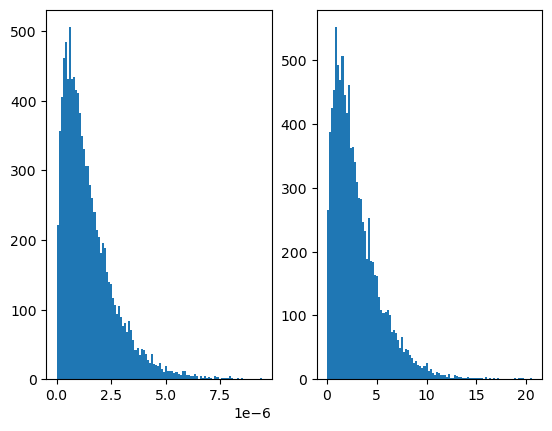

In [15]:
fig, axs = plt.subplots(1,2)
axs[0].hist(test_statistic, bins =100)
axs[1].hist(numpy.random.chisquare(alphabet_size-1, 10000), bins =100)

In [11]:
numpy.random.chisquare(alphabet_size-1, 10000)

array([3.12911011, 4.46915588, 7.67141197, ..., 0.63649142, 2.48654217,
       2.93446103])

In [51]:
a.eq(1).mul(-2)

tensor([[ 0,  0,  0, -2,  0],
        [ 0,  0,  0, -2,  0]])

In [3]:
gen = data_generator(device)

In [51]:
p, p_priv = gen._generate_power_law_p_private(10,2.1, 0.5)

<BarContainer object of 10 artists>

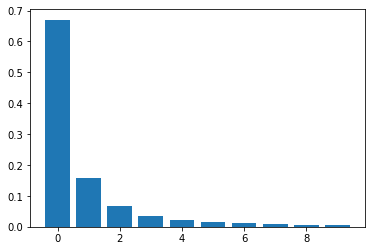

In [52]:
plt.bar(range(10), p.cpu())

<BarContainer object of 10 artists>

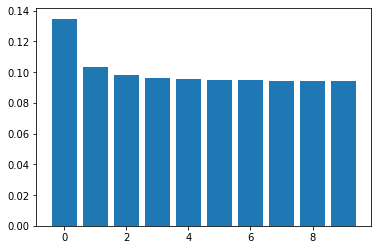

In [53]:
plt.bar(range(10), p_priv.cpu())

In [2]:
t = time.time()

server_now = server_twosample_U(device)
data_gen = data_generator(device)
alphabet_size = 1000
beta = 0.5
privacy_level = 1
n_test = 1
n_permutation = 99
significance_level = 0.05
sample_size = 100000
test_result = torch.zeros(n_test).to(device)
for i in range(n_test):
    data_y = data_gen.generate_nearly_unif(alphabet_size, beta, sample_size = sample_size)
    data_z = data_gen.generate_nearly_unif(alphabet_size, beta, sample_size = sample_size)
    LDPclient = client(device)
    LDPclient.load_data_disc(data_y, data_z, alphabet_size)
    data_y_priv, data_z_priv = LDPclient.release_lapu(privacy_level)
    test_result[i] = server_now.release_p_value(data_y_priv, data_z_priv, n_permutation)
    
    
elapsed = time.time() - t
elapsed

16.566758632659912

In [9]:
(data_y==0).sum()

tensor(1621, device='cuda:0')

In [15]:
torch.tensor([1,2,4]).bincount(minlength=6)

tensor([0, 1, 1, 0, 1, 0])

# performance of genrr 

In [25]:
t = time.time()

server_now = server_twosample_chi(device)
data_gen = data_generator(device)
alphabet_size = 3000
beta = 2.5
privacy_level = 0.01
n_test = 100
sample_size = 10000
test_result = torch.zeros(n_test).to(device)
for i in range(n_test):
    data_y = data_gen.generate_nearly_unif(alphabet_size, beta, sample_size = sample_size)
    data_z = data_gen.generate_nearly_unif(alphabet_size, beta, sample_size = sample_size)
    LDPclient = client(device)
    LDPclient.load_data_disc(data_y, data_z, alphabet_size)
    data_y_priv, data_z_priv = LDPclient.release_genrr(privacy_level)
    test_result[i] = server_now.release_p_value(data_y_priv, data_z_priv, alphabet_size)
    
    
elapsed = time.time() - t
elapsed

131.28636121749878

In [24]:
(test_result < 0.7).sum()/n_test 

tensor(0.7100, device='cuda:0')

In [6]:
data_y_priv.dtype

torch.int64

# testing the discretizer

In [38]:
p = torch.tensor([0.2, 0.6, 0.1, 0.1])
n_sample = 10
random_multinomial = torch.multinomial(p, n_sample, replacement=True).view(-1)



LDPclient = client(device)
LDPclient.load_data_disc(random_multinomial, random_multinomial, 4)


# testing the lapu for discrete data

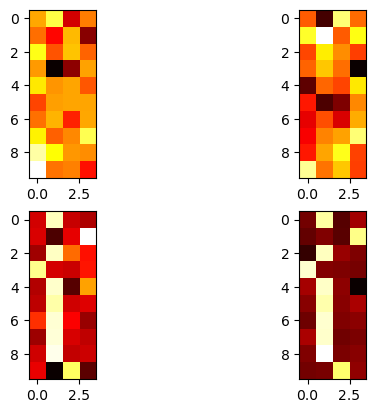

In [43]:
fig, axs = plt.subplots(2,2)
axs[0,0].imshow(LDPclient.release_lapu(0.5)[1], cmap = 'hot', interpolation = 'nearest')
axs[0,1].imshow(LDPclient.release_lapu(1)[1], cmap = 'hot', interpolation = 'nearest')
axs[1,0].imshow(LDPclient.release_lapu(20)[1], cmap = 'hot', interpolation = 'nearest')
axs[1,1].imshow(LDPclient.release_lapu(50)[1], cmap = 'hot', interpolation = 'nearest')

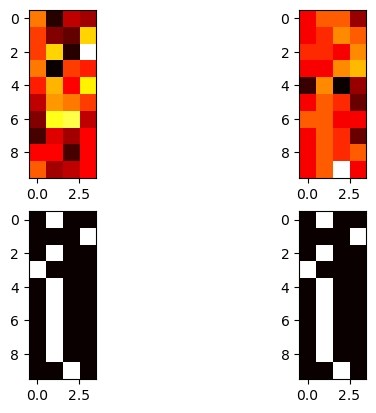

In [42]:
fig, axs = plt.subplots(2,2)
axs[0,0].imshow(LDPclient.release_Disclapu(0.5)[1], cmap = 'hot', interpolation = 'nearest')
axs[0,1].imshow(LDPclient.release_Disclapu(1)[1], cmap = 'hot', interpolation = 'nearest')
axs[1,0].imshow(LDPclient.release_Disclapu(20)[1], cmap = 'hot', interpolation = 'nearest')
axs[1,1].imshow(LDPclient.release_Disclapu(50)[1], cmap = 'hot', interpolation = 'nearest')

C:\Users\Jongmin\AppData\Local\Temp\ipykernel_13600\1939938785.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(LDPclient.release_genrr(0.5)[1]),
C:\Users\Jongmin\AppData\Local\Temp\ipykernel_13600\1939938785.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(LDPclient.release_genrr(1)[1]),
C:\Users\Jongmin\AppData\Local\Temp\ipykernel_13600\1939938785.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(LDPclient.release_genrr(20)[1]),
C:\Users\Jongmin\AppData\Local\Temp\ipykernel_13600\1939938

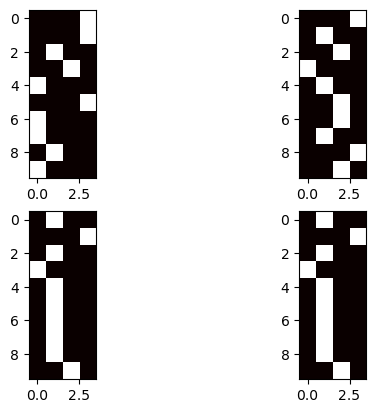

In [45]:
fig, axs = plt.subplots(2,2)
axs[0,0].imshow(
    torch.nn.functional.one_hot(
        torch.tensor(LDPclient.release_genrr(0.5)[1]),
        4
        ),
    cmap = 'hot', interpolation = 'nearest'
)

axs[0,1].imshow(
    torch.nn.functional.one_hot(
        torch.tensor(LDPclient.release_genrr(1)[1]),
        4
        ),
    cmap = 'hot', interpolation = 'nearest'
)

axs[1,0].imshow(
    torch.nn.functional.one_hot(
        torch.tensor(LDPclient.release_genrr(20)[1]),
        4
        ),
    cmap = 'hot', interpolation = 'nearest'
)

axs[1,1].imshow(
    torch.nn.functional.one_hot(
        torch.tensor(LDPclient.release_genrr(20)[1]),
        4
        ),
    cmap = 'hot', interpolation = 'nearest'
)

C:\Users\Jongmin\AppData\Local\Temp\ipykernel_13600\4008632034.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  axs[0,0].imshow(torch.tensor(LDPclient.release_bitflip(0.5)[1]),cmap = 'hot', interpolation = 'nearest')
C:\Users\Jongmin\AppData\Local\Temp\ipykernel_13600\4008632034.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  axs[0,1].imshow(torch.tensor(LDPclient.release_bitflip(1)[1]),cmap = 'hot', interpolation = 'nearest')
C:\Users\Jongmin\AppData\Local\Temp\ipykernel_13600\4008632034.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTe

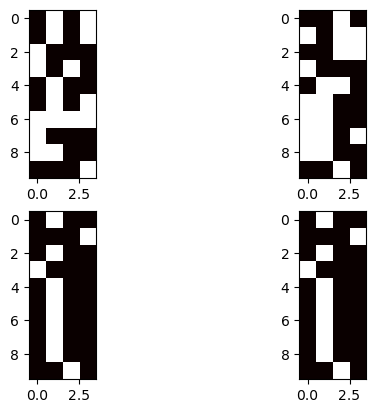

In [46]:
fig, axs = plt.subplots(2,2)
axs[0,0].imshow(torch.tensor(LDPclient.release_bitflip(0.5)[1]),cmap = 'hot', interpolation = 'nearest')
axs[0,1].imshow(torch.tensor(LDPclient.release_bitflip(1)[1]),cmap = 'hot', interpolation = 'nearest')
axs[1,0].imshow(torch.tensor(LDPclient.release_bitflip(10)[1]),cmap = 'hot', interpolation = 'nearest')
axs[1,1].imshow(torch.tensor(LDPclient.release_bitflip(10)[1]),cmap = 'hot', interpolation = 'nearest')


In [57]:
a = (LDPclient.release_bitflip(0.5)[1]).mean(axis=0).view([4,1])
device.type == "cpu"

In [12]:
import numpy
torch.tensor(numpy.linalg.inv(torch.eye(3) - torch.ones(torch.Size([3,3])).numpy())).div(3)

tensor([[ 0.1667, -0.1667, -0.1667],
        [-0.1667,  0.1667, -0.1667],
        [-0.1667, -0.1667,  0.1667]])

In [6]:
torch.ones(torch.Size([3,3])).inverse().div()

RuntimeError: Calling torch.linalg.lu_factor on a CPU tensor requires compiling PyTorch with LAPACK. Please use PyTorch built with LAPACK support.

In [ ]:
axs[0,1].imshow(torch.nn.functional.one_hot(torch.tensor(LDPclient.release_genrr(1), 16)), cmap = 'hot', interpolation = 'nearest')
axs[1,0].imshow(torch.nn.functional.one_hot(torch.tensor(LDPclient.release_genrr(10), 16)), cmap = 'hot', interpolation = 'nearest')
axs[1,1].imshow(torch.nn.functional.one_hot(torch.tensor(LDPclient.release_genrr(100), 16)), cmap = 'hot', interpolation = 'nearest')

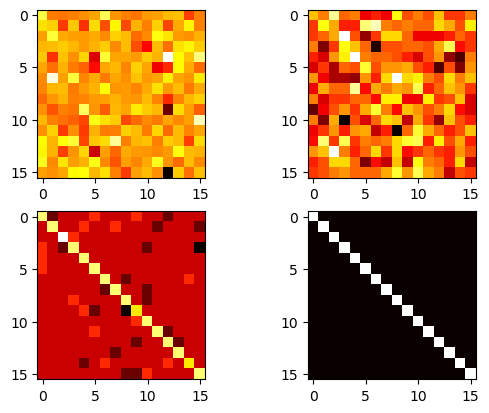

In [9]:
fig, axs = plt.subplots(2,2)
axs[0,0].imshow(LDPclient.release_Disclapu(0.5)[1], cmap = 'hot', interpolation = 'nearest')
axs[0,1].imshow(LDPclient.release_Disclapu(1)[1], cmap = 'hot', interpolation = 'nearest')
axs[1,0].imshow(LDPclient.release_Disclapu(10)[1], cmap = 'hot', interpolation = 'nearest')
axs[1,1].imshow(LDPclient.release_Disclapu(100)[1], cmap = 'hot', interpolation = 'nearest')

